I reproduce below, for learning purposes, the analysis from this amazing tutorial: https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week7/Intro_to_PCA.html.

We will look at sea surface temperature (SST) data in the tropical Pacific ocean, and we will find that PCA reveals the signature of the El Niño / Southern Oscillation (ENSO) phenomenon without any prior knowledge of ENSO.
I have no idea what this means for the moment, hopefully it will be clear later.

The ENSO is a major climate pattern involving periodic changes in SSTs across the tropical Pacific Ocean. It has powerful effects on global weather, ocean conditions, and climate patterns.
Its "signature" is measured through the [Nino SST Indices](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni).
These are a number of indices used to monitor tropical Pacific, based on anomalies on SST.
We will use the Niño 3.4, which refers to the region (5N-5S, 170W-120W).

They give a general recipe for how to compute the index:

*Nino X Index computation: (a) Compute area averaged total SST from Niño X region; (b) Compute monthly climatology (e.g., 1950-1979) for area averaged total SST from Niño X region, and subtract climatology from area averaged total SST time series to obtain anomalies; (c) Smooth the anomalies with a 5-month running mean; (d) Normalize the smoothed values by its standard deviation over the climatological period.*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', size=14)

### Get Data
We use the dataset [NOAA Extended Reconstructed SST V5](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html).
The dataset contains `.nc` files. 
Such files are produced and handles by the software/library [`netCDF`](https://www.unidata.ucar.edu/software/netcdf/).
The Python library [NetCDF4](https://unidata.github.io/netcdf4-python/) offers an interface to the C library.

The dataset is also available in the [IRI Data Library](https://iridl.ldeo.columbia.edu/index.html?Set-Language=en), and we use that one to adhere to the tutorial we are following.

In [2]:
!pip install netCDF4

In [3]:
from netCDF4 import Dataset

iri_url = "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/"
T_convert = "T/[(days)(since)(1960-01-01)]sconcat/streamgridunitconvert/"

# complete url
url = iri_url + T_convert + "dods"

nc = Dataset(url)
nc.dimensions

{'T': "<class 'netCDF4.Dimension'>": name = 'T', size = 2056,
 'X': "<class 'netCDF4.Dimension'>": name = 'X', size = 180,
 'Y': "<class 'netCDF4.Dimension'>": name = 'Y', size = 89,
 'zlev': "<class 'netCDF4.Dimension'>": name = 'zlev', size = 1}

In [4]:
# here it actually downloads the data! It will take several minutes

sst = nc.variables['sst'][:] 
lat = nc.variables['Y'][:] # Y = latitude
lon = nc.variables['X'][:] # X = longitude
time = nc.variables['T'][:] # T = time

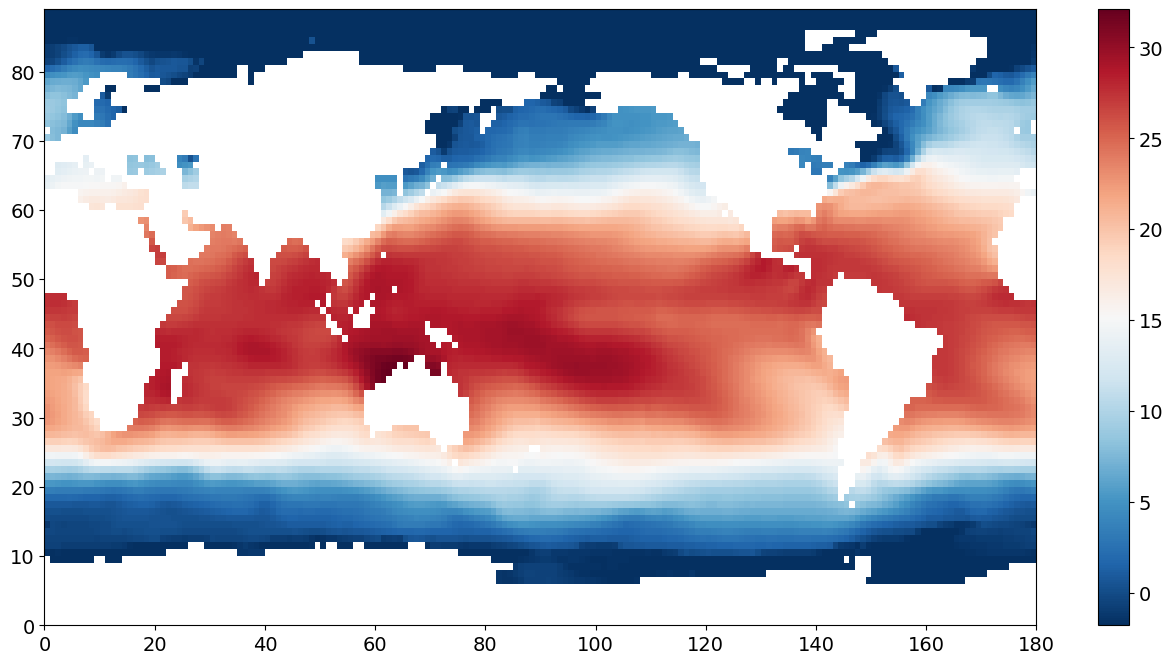

In [6]:
plt.figure(figsize=(16,8))
plt.pcolormesh(sst[0,0,:,:], cmap='RdBu_r') # sst has shape (time, depth, lat, lon)
plt.colorbar()
plt.show()

### PCA on a subregion

In [ ]:
sst_pac = sst[12*96:-10,0,29:59,60:150]
ssta_pac = sst_pac - sst_pac.mean(axis=0) # this is supposed to be "computing the anomaly"

a = np.ma.masked_invalid(ssta_pac).filled(0.) # replace nans with zeros
a = (a - a.mean())/a.std() # standardize

print(a.shape)

(894, 30, 90)


In [ ]:
# reshape to compute PCA

Nt, Ny, Nx = a.shape
a = a.reshape(Nt, Ny*Nx)

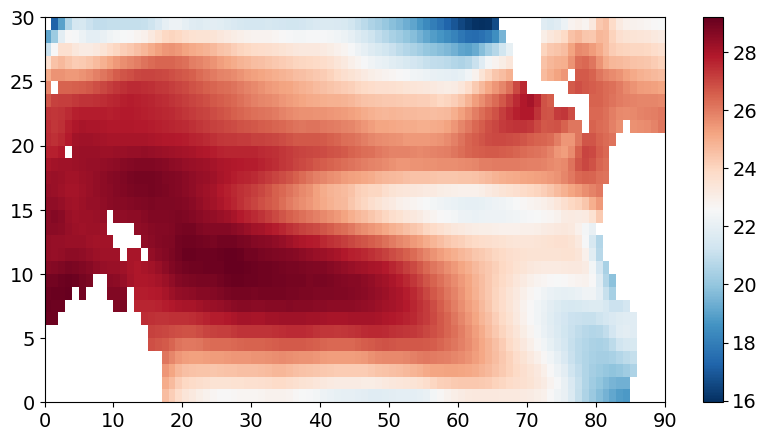

In [11]:
plt.figure(figsize=(10,5))
plt.pcolormesh(sst_pac[0,:,:],cmap = "RdBu_r")
plt.colorbar()

In [ ]:
# fill in missing values with zeros
a = np.ma.masked_invalid(ssta_pac).filled(0.)


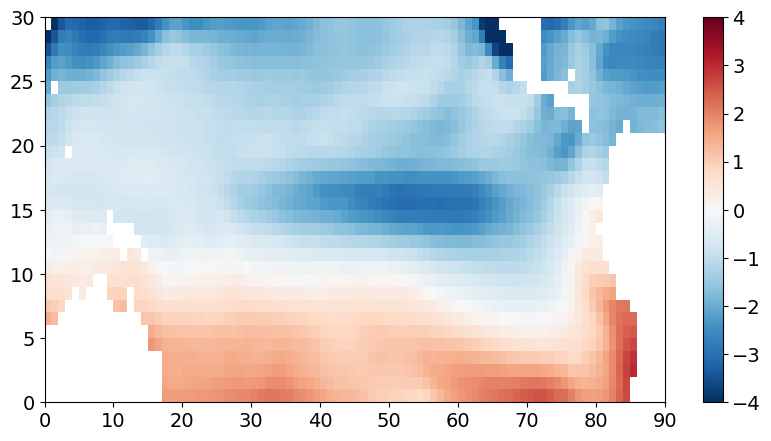

In [ ]:
ssta_pac = sst_pac - sst_pac.mean(axis=0)

plt.figure(figsize=(10,5))
plt.pcolormesh(ssta_pac[0,:,:],cmap = "RdBu_r")
plt.clim(-4,4)
plt.colorbar()

### Compute the Nino 3.4 Index